In [40]:
# Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# Load dataset
country = pd.read_csv('country_complete.csv')
country

,Country,Continent,Years,Internet access,Emissions range,Fertility,Emissions,Internet
0,Afghanistan,Asia,3.8,Low,Low,4.33,0.254,16.8
1,Albania,Europe,10.0,Moderate,Low,1.71,1.590,65.4
2,Algeria,Africa,8.0,Low,Moderate,2.64,3.690,49.0
3,Angola,Africa,5.1,Low,Low,5.55,1.120,29.0
4,Argentina,Americas,9.9,High,Moderate,2.26,4.410,77.7
...,...,...,...,...,...,...,...,...
146,Uruguay,Americas,8.7,High,Moderate,1.97,2.010,80.7
147,Uzbekistan,Asia,11.5,Moderate,Moderate,2.23,2.810,55.2
148,Vietnam,Asia,8.2,Moderate,Moderate,1.95,2.160,69.8
149,Zambia,Africa,7.0,Low,Low,4.87,0.302,14.3


In [3]:
X = country[["Years"]]
y = country[["Emissions range"]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [5]:
LGmodel = LogisticRegression(random_state = 234)
LGmodel.fit(X_train, np.ravel(y_train))

LogisticRegression(random_state=234)

In [6]:
y_predLGmodel = LGmodel.predict(X_test)

In [7]:
metrics.accuracy_score(y_test, y_predLGmodel)

0.5806451612903226

In [8]:
conf = metrics.confusion_matrix(y_test, y_predLGmodel)

Text(33.0, 0.5, 'Actual')

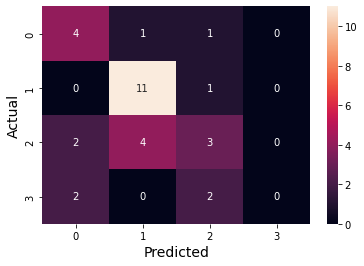

In [9]:
sns.heatmap(conf, annot = True)
plt.xlabel("Predicted", fontsize = 14)
plt.ylabel("Actual", fontsize = 14)

In [10]:
yr = country[["Emissions"]]
X_train, X_test, y_train, y_test = train_test_split(X, yr, test_size = 0.2, random_state = 123)

In [11]:
reg_model = LinearRegression()
reg_model.fit(X_train, np.ravel(y_train))

LinearRegression()

In [12]:
y_predregmodel = reg_model.predict(X_test)

In [13]:
metrics.mean_squared_error(y_test, y_predregmodel)

17.009964309043887

In [120]:
df = country.sample(6, random_state=12352)
m, b = np.polyfit(df.Years, df.Emissions, 1)
df

,Country,Continent,Years,Internet access,Emissions range,Fertility,Emissions,Internet
112,Poland,Europe,12.3,High,High,1.29,9.070,77.5
130,Sri Lanka,Asia,10.9,Low,Low,2.02,1.100,26.0
45,Ethiopia,Africa,2.7,Low,Low,3.97,0.137,20.0
12,Belarus,Europe,12.3,High,High,1.72,6.930,79.1
65,Iran,Asia,9.8,High,High,1.61,8.810,70.2
126,South Africa,Africa,10.1,Moderate,High,2.40,8.100,62.4


Text(0, 0.5, 'Emissions')

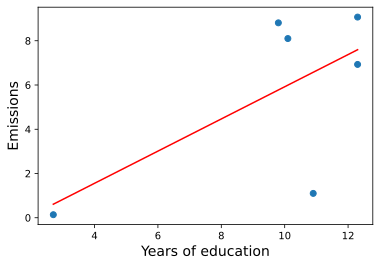

In [136]:
plt.scatter(x=df.Years, y=df.Emissions)
x = np.array([2.7, 4, 5, 12.3])
plt.plot(x, m*x+b, color="red")
plt.xlabel("Years of education", fontsize=14)
plt.ylabel("Emissions", fontsize=14)

Text(0, 0.5, 'Emissions')

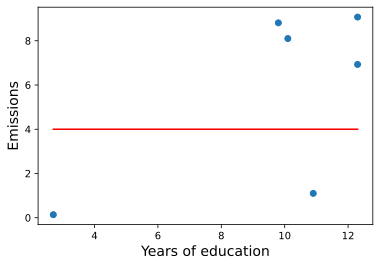

In [145]:
plt.scatter(x=df.Years, y=df.Emissions)
x = np.array([2.7,12.3])
y = np.array([4,4])
plt.plot(x,y, color="red")
plt.xlabel("Years of education", fontsize=14)
plt.ylabel("Emissions", fontsize=14)

In [121]:
#Hot encode the Diagnosis variable as a numeric variable with 0 for benign and 1 for malignant
df.loc[df['Emissions range']=='High','Emissions range']=1
df.loc[df['Emissions range']=='Low','Emissions range']=0
df[['Years','Emissions range']]

,Years,Emissions range
112,12.3,1
130,10.9,0
45,2.7,0
12,12.3,1
65,9.8,1
126,10.1,1


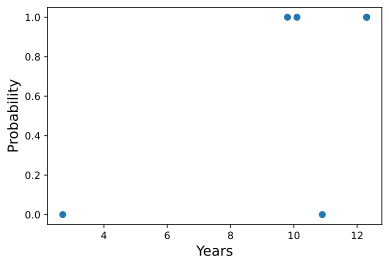

In [127]:
#Store relevant columns as variables
X = df[['Years']].values.reshape(-1, 1)
y = df[['Emissions range']].values.reshape(-1, 1).astype(int)

#graph the observations
plt.scatter(X,y)
plt.xlabel('Years',fontsize=14);
plt.ylabel('Probability',fontsize=14);

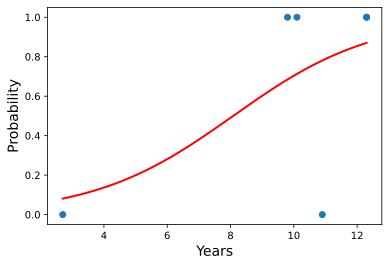

In [134]:
#Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression()
logisticModel.fit(X,np.ravel(y.astype(int)))

#Graph logistic regression probabilities
plt.scatter(X,y)
xDelta = np.linspace(X.min(),X.max(),1000)
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1,1))[:,1]
plt.plot(xDelta,yDeltaProb,linewidth = 2, color="red")
plt.xlabel('Years',fontsize=14);
plt.ylabel('Probability',fontsize=14);

/Users/cjschan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='Years'>

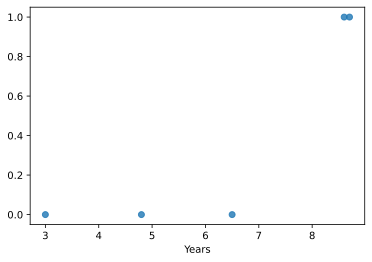

In [104]:
sns.regplot(x=x, y=y, logistic=True)

/Users/cjschan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='Years'>

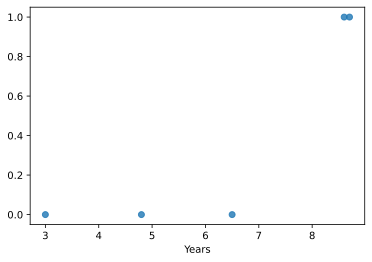

In [102]:
sns.regplot(x=x, y=y, logistic=True)